In [1]:
# IMPORT PACKAGES
import numpy as np
import pandas as pd

In [2]:
# IMPORT ALL DATA FROM .CSV INTO DATAFRAME
df_Drivers = pd.read_csv("Transportation_Network_Providers_-_Drivers.csv") 

C:\Users\Vik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_Drivers = pd.read_csv("Transportation_Network_Providers_-_Drivers.csv") 
df_Drivers.describe()

,NUMBER_OF_TRIPS
count,4.809957e+06
mean,5.894990e+01
std,1.099643e+02
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,7.000000e+01
max,9.990000e+02


In [4]:
df_Drivers.head()

,MONTH_REPORTED,DRIVER_START_MONTH,CITY,STATE,ZIP,NUMBER_OF_TRIPS,MULTIPLE_TNPS
0,2016-08,2015-12,Aurora,IL,60505,342.0,False
1,2018-01,2017-02,Chicago,IL,60612,391.0,True
2,2018-01,2015-03,Dolton,IL,60419,371.0,True
3,2017-09,2017-07,Eilmette,IL,60091,251.0,False
4,2018-06,2018-02,Chicago,IL,60606,332.0,False


# definition of each column
![title](Drivers_INFO.PNG)

All drivers reported by Transportation Network Providers (sometimes called rideshare companies) to the City of Chicago as part of the licensing process and routine reporting required by ordinance. Inclusion of a driver in a monthly report indicates that the driver was eligible for trips in Chicago in that month for at least one day, regardless of whether he or she actually provided any rides. If a driver is eligible in multiple months, which is common, he or she will have records in each of these reporting months. 

As of the creation of this dataset, there have been four TNPs licensed to operate in Chicago, although never more than three at any given time and currently three. Drivers reported by more than one company in the same month are combined and the MULTIPLE_TNPS column is marked as TRUE. However, the matching process is imperfect so not all such drivers are necessarily identified. Similarly, matching between the licensing and routine reporting databases is imperfect, creating potential for occasional errors.

The reporting is done on a monthly basis, as indicated in the MONTH_REPORTED column. However, starting in 2018, the reports are batched and files for all three months in a quarter are delivered to the City of Chicago at the end of each quarter. Due to an issue in this transition, some vehicle records for Q2 2018 (April-June) were reported for the quarter as a whole, rather than for individual months. For purposes of this dataset, those records have been assigned to 2018-06 (June). Therefore, some caution in interpreting this month and the quarter as a whole is advised.

In [5]:
grouped = df_Drivers[['CITY','NUMBER_OF_TRIPS']].dropna().groupby(['CITY']).agg(['mean','min','max'])
grouped

NUMBER_OF_TRIPS              
                        mean    min    max
CITY                                      
Aacworth            0.000000    0.0    0.0
Abbott Park       134.068966    3.0  241.0
Aberdeen          111.500000   28.0  195.0
Abilene             0.000000    0.0    0.0
Abingdon           11.000000   11.0   11.0
Achaumburg          6.259259    0.0   29.0
Acksonville        40.400000    0.0  140.0
Acworth             0.000000    0.0    0.0
Ada                 3.142857    0.0   31.0
Adamsville          0.000000    0.0    0.0
Addision            7.937500    0.0   33.0
Addison            60.456102    0.0  927.0
Addison Il         27.700000    0.0  129.0
Addison, Il       123.000000  123.0  123.0
Adelanto            0.000000    0.0    0.0
Adelphi            81.666667   34.0  141.0
Affton             11.875000    0.0   36.0
Aiea                9.000000    0.0   39.0
Ailey              39.833333    0.0  173.0
Akokie             14.909091    0.0   80.0
Akron              35.244444    0.0  341.0
Al Gonquin          0.681818    0.0    6.0
Alabaster          10.400000    0.0   52.0
Alameda            58.110169    0.0  309.0
Albany            295.000000    0.0  972.0
Albuqerque         42.894737    0.0  275.0
Albuquerque       123.930435    0.0  594.0
Alexanderia         0.000000    0.0    0.0
Alexandria         47.965517    0.0  503.0
Algin               0.000000    0.0    0.0
...                      ...    ...    ...
Yakima             26.250000    0.0   40.0
Yarmouth          113.777778    0.0  341.0
Yazoo             185.333333  120.0  237.0
Yazoo City        185.228571    0.0  511.0
Yernon Hills       36.833333    3.0  104.0
Yoder             209.000000   24.0  426.0
Yonkers           177.976744    0.0  484.0
Yorba Linda         4.333333    0.0   13.0
York               41.250000    0.0  234.0
York Ville        143.550000    0.0  459.0
Yorktown           12.142857    0.0   41.0
Yorkville          26.749709    0.0  502.0
Yorkville Il      187.250000   74.0  293.0
Yorkvillw           3.800000    0.0   26.0
Yorlville           0.000000    0.0    0.0
Yorville            0.000000    0.0    0.0
Yorvkville          0.040000    0.0    1.0
Youngstown         70.960000    0.0  391.0
Yourkville         31.833333    0.0  110.0
Ypsilanti         101.671233    0.0  407.0
Yuba City          73.750000    0.0  277.0
Yukon               2.166667    0.0   14.0
Yuma               42.615385    0.0  125.0
Zachary            68.166667    0.0  191.0
Zaldivar            7.083333    0.0   49.0
Zeeland            20.000000    0.0   32.0
Zion               45.905282    0.0  850.0
Zionsville          6.153846    0.0   58.0
Zyons              52.500000    0.0  184.0
Ã¿Vanston          57.833333    0.0  161.0

[5539 rows x 3 columns]

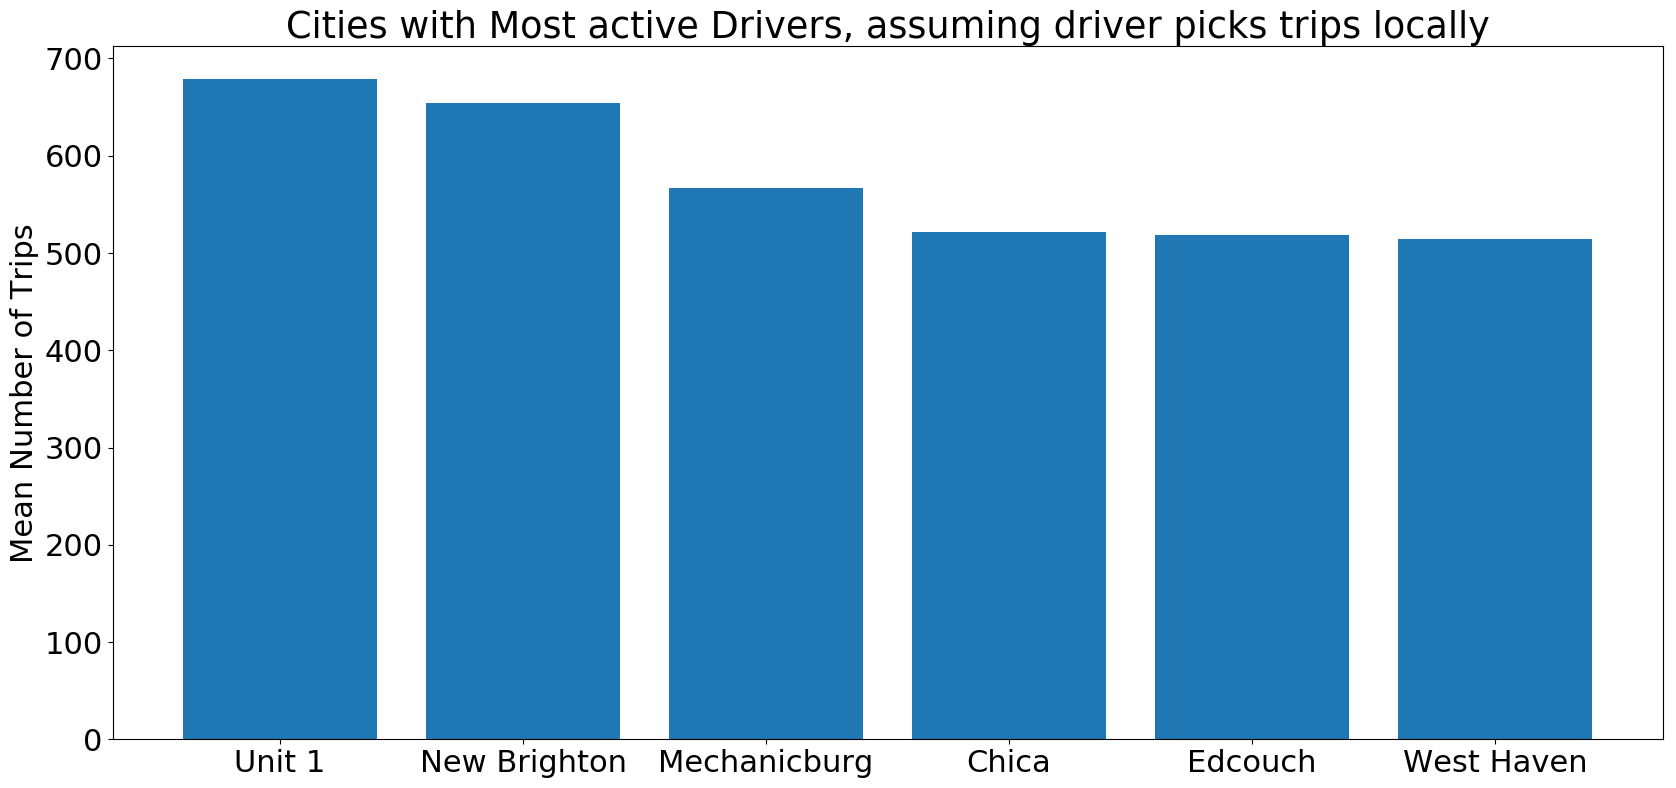

In [12]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = grouped['NUMBER_OF_TRIPS']['mean'].nlargest(6).index
y_pos = np.arange(len(objects))
mean_num_trips = grouped['NUMBER_OF_TRIPS']['mean'].nlargest(6)

plt.figure(figsize=(20, 9))
plt.rcParams.update({'font.size': 22})
plt.bar(y_pos, mean_num_trips, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Number of Trips')
plt.title('Cities with Most active Drivers, assuming driver picks trips locally')

plt.show()

# Vehicles

In [13]:
df_Vehicles = pd.read_csv("Transportation_Network_Providers_-_Vehicles.csv") 
df_Vehicles.describe()

,YEAR,NUMBER_OF_TRIPS
count,4.807018e+06,4.803369e+06
mean,2.011635e+03,5.994858e+01
std,1.328926e+01,1.082885e+02
min,0.000000e+00,0.000000e+00
25%,2.009000e+03,0.000000e+00
50%,2.013000e+03,5.000000e+00
75%,2.015000e+03,7.400000e+01
max,2.017700e+04,9.990000e+02


In [14]:
df_Vehicles.head()

,MONTH_REPORTED,STATE,MAKE,MODEL,COLOR,YEAR,LAST_INSPECTION_MONTH,NUMBER_OF_TRIPS,MULTIPLE_TNPS
0,2017-09,IL,Nissan,Pathfinder,Red,2016.0,2017-06,NaN,True
1,2016-10,IL,Nissan,Altima,NaN,2016.0,NaN,NaN,True
2,2018-01,IL,Nissan,Altima,Gray,2014.0,2017-10,NaN,True
3,2015-12,IL,Toyota,Prius,NaN,2010.0,NaN,0.0,False
4,2017-10,IL,Toyota,Camry,Gray,2012.0,2017-09,NaN,True


# definition of each column
![title](Vehicles_INFO_1.PNG)

All vehicles reported by Transportation Network Providers (sometimes called rideshare companies) to the City of Chicago as part of routine reporting required by ordinance. Inclusion of a vehicle in a monthly report indicates that the vehicle was eligible for trips in Chicago in that month for at least one day, regardless of whether it actually provided any rides. If a vehicle is eligible in multiple months, which is common, it will have records in each of these reporting months. 

As of the creation of this dataset, there have been four TNPs licensed to operate in Chicago, although never more than three at any given time and currently three. Vehicles reported by more than one company in the same month are combined and the MULTIPLE_TNPS column is marked as TRUE. However, the matching process is imperfect so not all such vehicles are necessarily identified. 

Information on last inspection date was not required before September 2017 so will not be found in older records. 

The reporting is done on a monthly basis, as indicated in the MONTH_REPORTED column. However, starting in 2018, the reports are batched and files for all three months in a quarter are delivered to the City of Chicago at the end of each quarter. Due to an issue in this transition, some vehicle records for Q2 2018 (April-June) were reported for the quarter as a whole, rather than for individual months. For purposes of this dataset, those records have been assigned to 2018-06 (June). Therefore, some caution in interpreting this month and the quarter as a whole is advised.

In [15]:
grouped = df_Vehicles[['MODEL','NUMBER_OF_TRIPS']].dropna().groupby(['MODEL']).agg(['mean','min','max'])
grouped

NUMBER_OF_TRIPS             
                                 mean   min    max
MODEL                                             
1 Series                     0.333333   0.0    1.0
1/3/00                      13.750000   0.0   44.0
10/26/00                    24.250000   0.0   58.0
100                         30.785714   0.0  155.0
121                         48.710526   0.0  215.0
12c                         25.750000   0.0  103.0
1500                        21.560875   0.0  473.0
159                          0.000000   0.0    0.0
166                          0.000000   0.0    0.0
190                          1.250000   0.0    5.0
190-Class                    0.222222   0.0    2.0
1series                     22.666667   0.0  117.0
1vwas7a33fc089834            0.666667   0.0    2.0
2                           45.058383   0.0  579.0
200                         54.472073   0.0  986.0
200.0                       19.166667   0.0  113.0
200sx                       26.105263   0.0  130.0
220                          0.000000   0.0    0.0
240                          5.142857   0.0   27.0
2500                        21.341463   0.0  134.0
2g1wa5e35d1124243           53.777778   0.0  338.0
2series                      6.000000   0.0   40.0
2series Active Tourer        0.500000   0.0    2.0
2series Gran Tourer         28.090909   0.0   82.0
3                           64.927935   0.0  994.0
3 Series                    28.777588   0.0  714.0
3 Series Edrive             28.081633   0.0  291.0
3 Series Gran Turismo       18.059524   0.0  177.0
3-Sep                       28.072727   0.0  227.0
3-Series                    25.804649   0.0  856.0
...                               ...   ...    ...
Xjr                          7.945652   0.0  153.0
Xl-7                        42.547038   0.0  283.0
Xl7                         44.791284   0.0  870.0
Xt                           4.000000   2.0    6.0
Xt5                         43.093677   0.0  477.0
Xterra                      37.849032   0.0  535.0
Xts                         43.942398   0.0  847.0
Xtype                       44.255541   0.0  602.0
Xv                           0.000000   0.0    0.0
Xv Crosstrek                34.815298   0.0  514.0
Xv Crosstrek Hybrid         12.200000   0.0   25.0
Xvcrosstrek                  7.712766   0.0  109.0
Yahoe Ls                     0.000000   0.0    0.0
Yaris                       66.532171   0.0  996.0
Yaris Ia                    64.617801   0.0  940.0
Ypsilon                    142.555556  32.0  215.0
Yukon                       38.572070   0.0  784.0
Yukon Denali                28.155858   0.0  476.0
Yukon Hybrid                 5.000000   0.0   81.0
Yukon Xl                    25.909942   0.0  707.0
Yukon Xl 2500                0.000000   0.0    0.0
Yukon Xl Denali            146.916667  16.0  248.0
Yukonxl                     22.509804   0.0  310.0
Yukonxl2500                  0.000000   0.0    0.0
Z Roadster                   1.000000   1.0    1.0
Z769766                      0.000000   0.0    0.0
Zdx                         38.771845   0.0  432.0
Zephyr                      39.399002   0.0  384.0
Zum                          0.000000   0.0    0.0
Zv77653                     18.666667   0.0   83.0

[1500 rows x 3 columns]

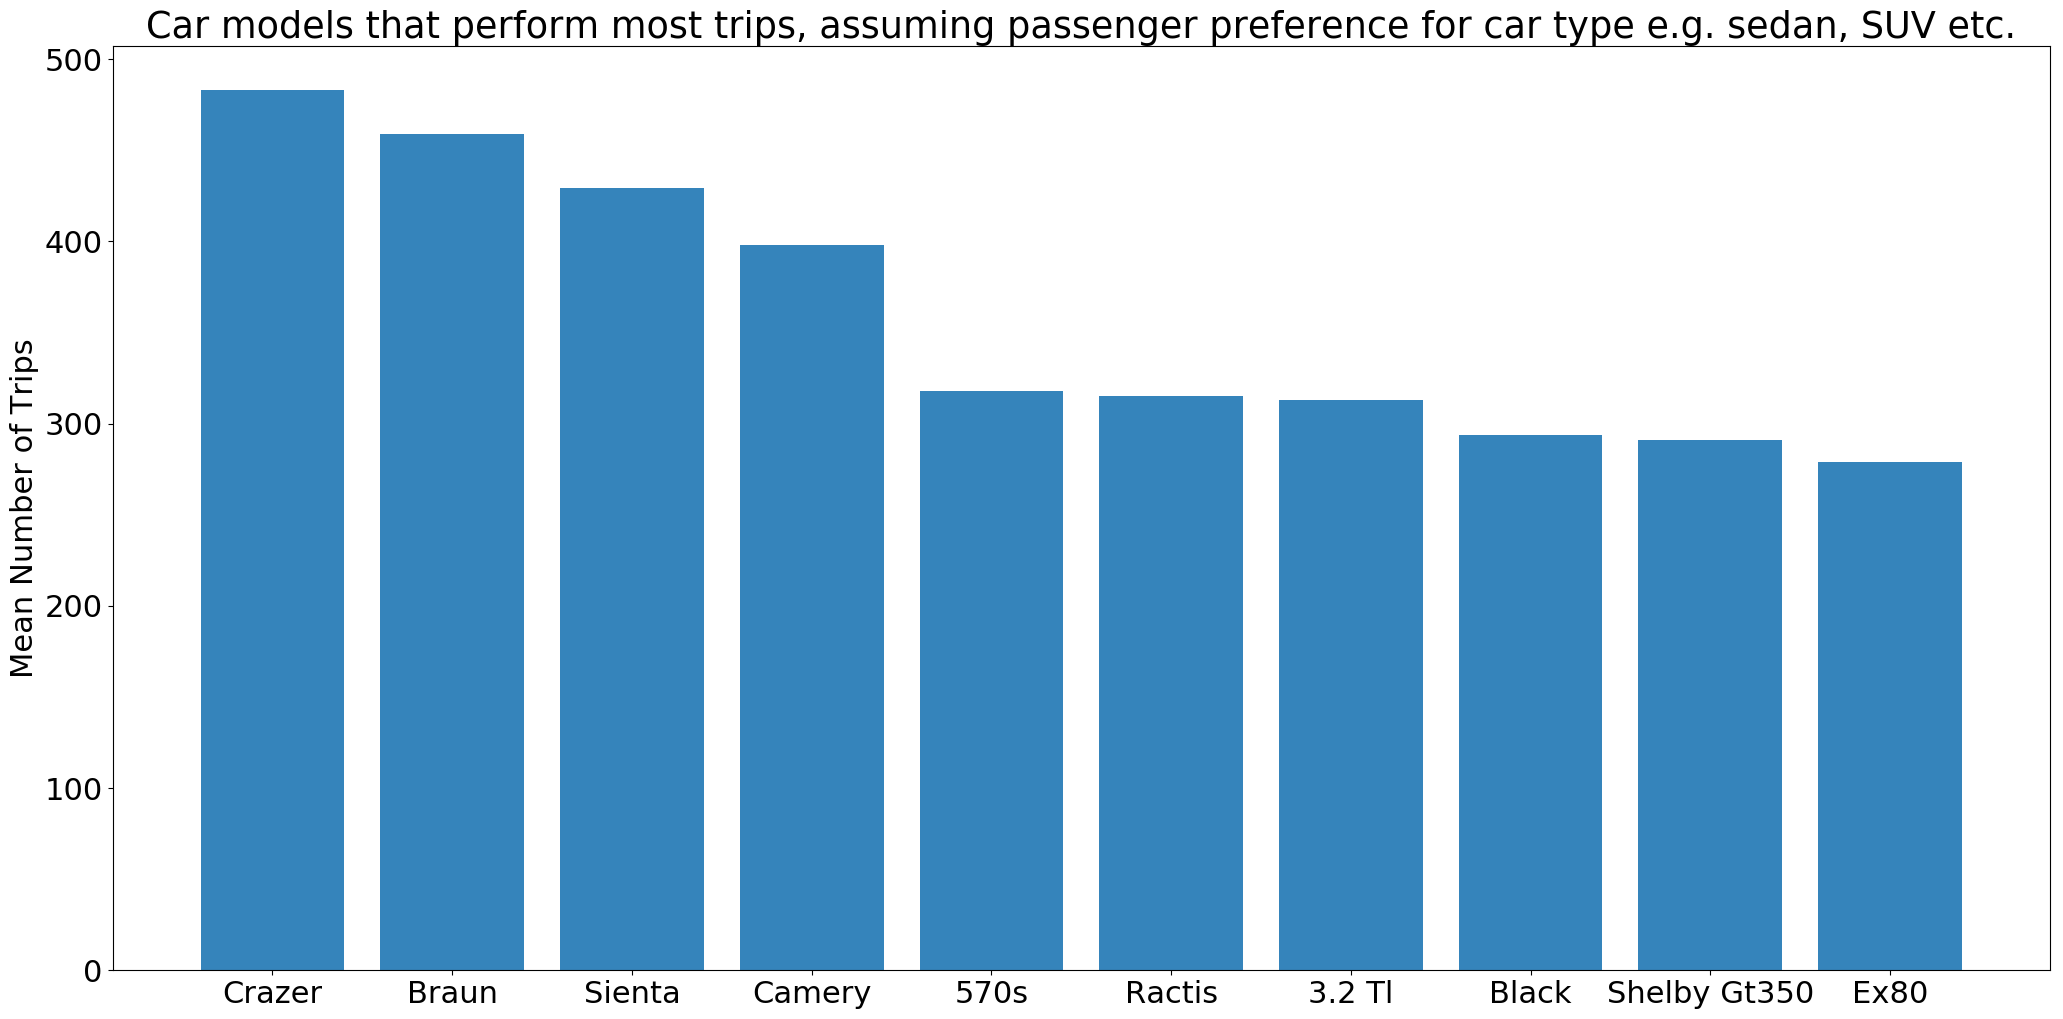

In [16]:
objects = grouped['NUMBER_OF_TRIPS']['mean'].nlargest(10).index
y_pos = np.arange(len(objects))
mean_num_trips = grouped['NUMBER_OF_TRIPS']['mean'].nlargest(10)

plt.figure(figsize=(25, 12))
plt.rcParams.update({'font.size': 22})
plt.bar(y_pos, mean_num_trips, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Number of Trips')
plt.title('Car models that perform most trips, assuming passenger preference for car type e.g. sedan, SUV etc.')

plt.show()

# preliminary analysis suggest 4 seaters are prefered. Not sure about Crazer or and Braun Car models, needs further analysis regarding what are they. SUV's seemed to be equally popular as Sedan, thus as long as car is 4 seater. Ride share drivers and passengers would definitely find 4 seaters more convenient

# Trip data

In [17]:
# READING FIRST MILLION ROWS AS OF NOW
df_Trips = pd.read_csv("Transportation_Network_Providers_-_Trips.csv", nrows=1000000)
df_Trips.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,999845.000000,1000000.000000,7.834590e+05,7.775160e+05,924995.000000,915573.000000,999996.000000,1000000.000000,999996.000000,999996.000000,1000000.000000,925732.000000,925732.000000,916222.000000,916222.000000
mean,1092.389692,6.211777,1.703136e+10,1.703138e+10,24.507748,25.312371,11.426853,0.577049,2.862366,14.866263,1.276666,41.895610,-87.665292,41.896250,-87.667839
std,793.976552,7.066162,3.350870e+05,3.417252e+05,19.917500,20.477104,10.033757,1.674404,1.950638,11.806066,0.699314,0.057176,0.061355,0.057583,0.065870
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.670000,1.000000,41.650222,-87.913625,41.650222,-87.913625
25%,539.000000,1.800000,1.703108e+10,1.703108e+10,8.000000,8.000000,5.000000,0.000000,2.500000,7.500000,1.000000,41.879255,-87.675312,41.879255,-87.676356
50%,873.000000,3.600000,1.703124e+10,1.703124e+10,24.000000,24.000000,7.500000,0.000000,2.500000,10.020000,1.000000,41.893216,-87.649907,41.893216,-87.649907
75%,1421.000000,7.700000,1.703183e+10,1.703183e+10,32.000000,32.000000,12.500000,0.000000,2.500000,17.500000,1.000000,41.929078,-87.631717,41.929273,-87.631717
max,47760.000000,273.600000,1.703198e+10,1.703198e+10,77.000000,77.000000,700.000000,100.000000,25.230000,702.050000,12.000000,42.021224,-87.531386,42.021224,-87.529950


In [18]:
df_Trips.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,022ad3b7f1320d4e52cce3d5931eb0a0cee16c48,11/01/2018 08:45:00 AM,11/01/2018 09:30:00 AM,3140.0,38.5,NaN,1.703198e+10,NaN,56.0,47.5,...,9.1,66.6,False,1,NaN,NaN,NaN,41.785999,-87.750934,POINT (-87.7509342894 41.785998518)
1,0377167460a4d5d5e015c642b460e56ac88dab71,11/01/2018 02:00:00 AM,11/01/2018 02:15:00 AM,1031.0,5.3,NaN,NaN,70.0,NaN,10.0,...,2.5,12.5,False,1,41.745758,-87.708366,POINT (-87.7083657043 41.7457577128),NaN,NaN,NaN
2,03a2ac30a46af881e6a2e6af06a3a779b67c0802,11/01/2018 08:15:00 PM,11/01/2018 09:15:00 PM,4125.0,49.9,1.703108e+10,NaN,8.0,NaN,62.5,...,3.8,66.3,False,1,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),NaN,NaN,NaN
3,03fe17b0509941aa04744e9e4478ed5ded56b2eb,11/01/2018 03:45:00 AM,11/01/2018 04:15:00 AM,1229.0,11.7,1.703183e+10,NaN,22.0,NaN,7.5,...,2.5,10.0,True,3,41.916005,-87.675095,POINT (-87.6750951155 41.9160052737),NaN,NaN,NaN
4,040590c0bf5b22f8ccf7d8f19873c612bebfd480,11/01/2018 05:00:00 PM,11/01/2018 06:00:00 PM,3383.0,12.3,NaN,1.703184e+10,NaN,32.0,27.5,...,2.5,30.0,False,1,NaN,NaN,NaN,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)


In [19]:
grouped_1 = df_Trips[['Trip Miles','Tip']].dropna().groupby(['Trip Miles']).agg(['mean'])
grouped_2 = df_Trips[['Trip Seconds','Tip']].dropna().groupby(['Trip Seconds']).agg(['mean'])
grouped_3 = df_Trips[['Trips Pooled','Tip']].dropna().groupby(['Trips Pooled']).agg(['mean'])
grouped_4 = df_Trips[['Fare','Tip']].dropna().groupby(['Fare']).agg(['mean'])

<Figure size 640x480 with 0 Axes>

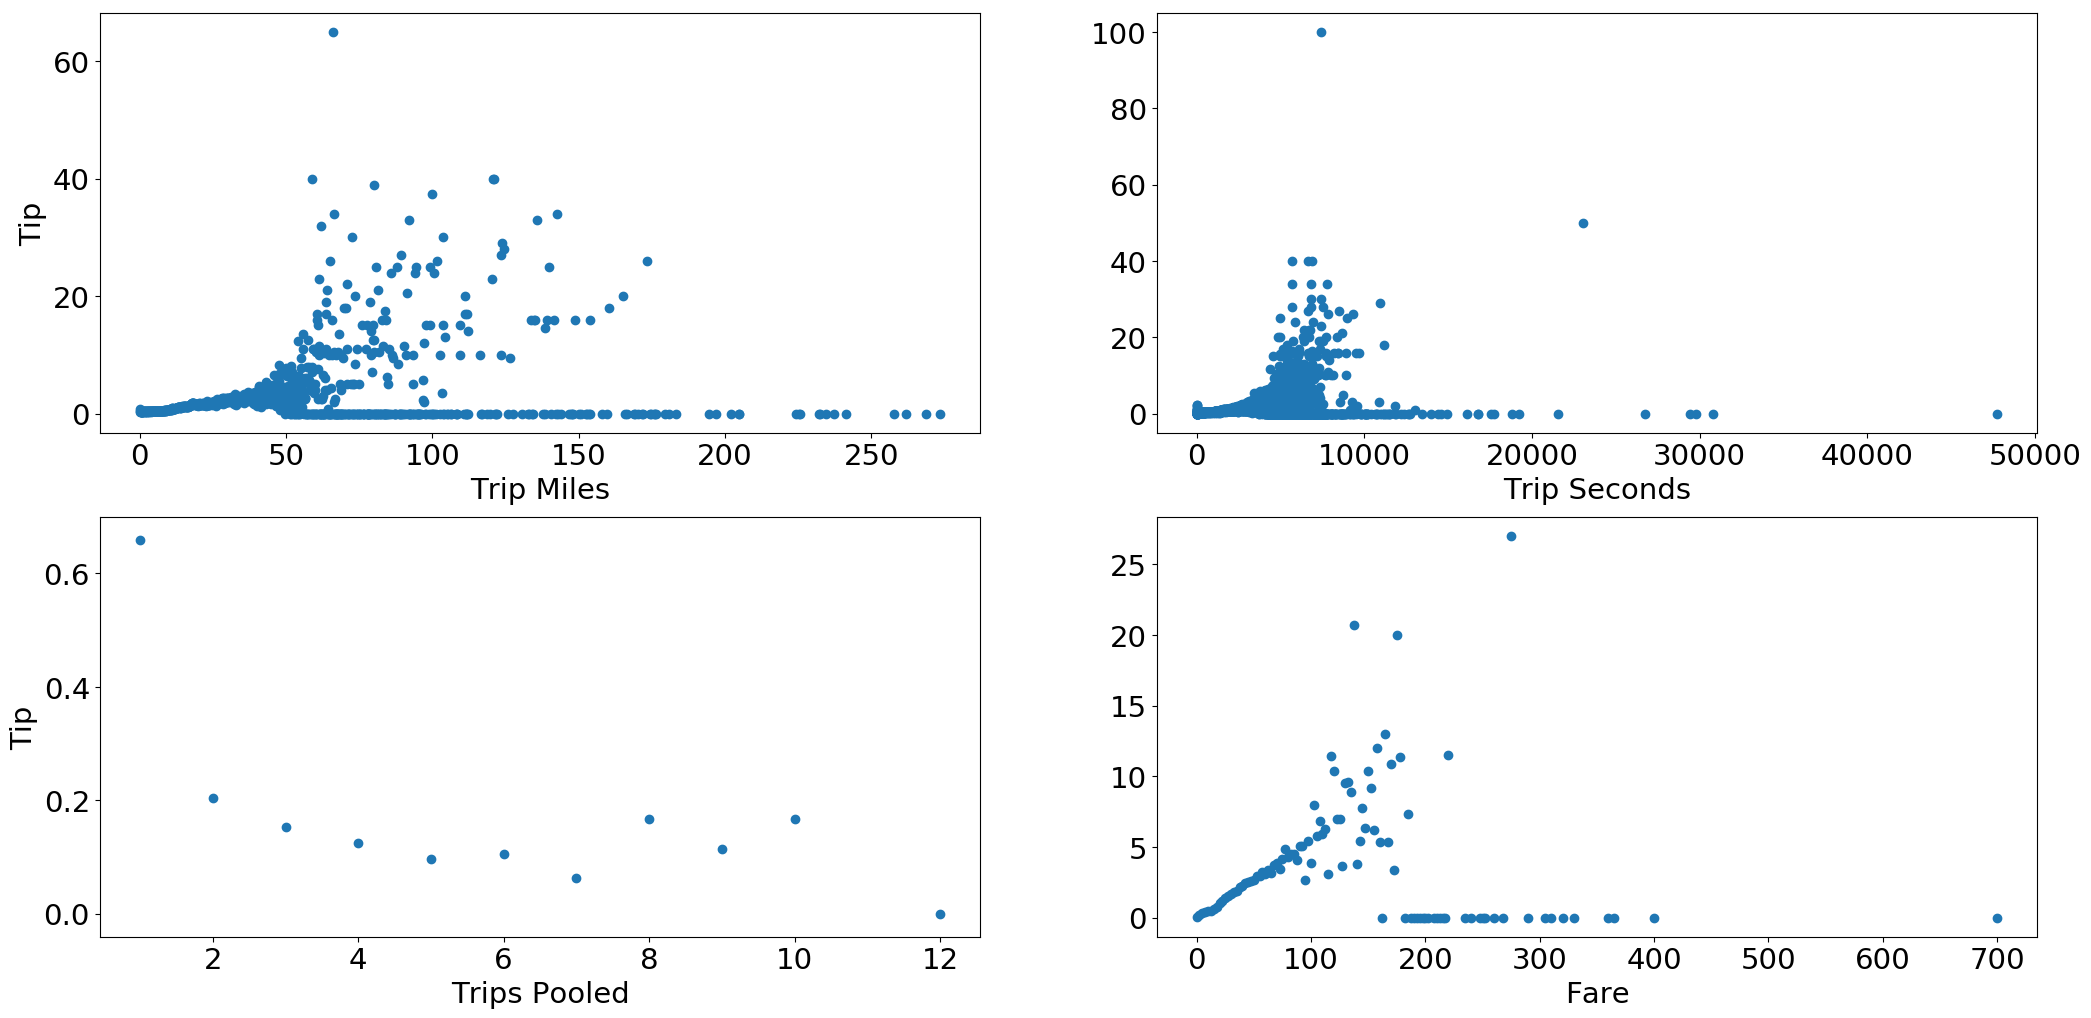

In [20]:
plt.rcParams.update({'font.size': 21})

x_1 = grouped_1.index
y_1 = grouped_1['Tip']['mean']

x_2 = grouped_2.index
y_2 = grouped_2['Tip']['mean']

x_3 = grouped_3.index
y_3 = grouped_3['Tip']['mean']

x_4 = grouped_4.index
y_4 = grouped_4['Tip']['mean']

fig = plt.figure()
plt.figure(figsize=(25, 12))

plt.subplot(2, 2, 1)
plt.scatter(x_1, y_1)
plt.ylabel('Tip')
plt.xlabel('Trip Miles')

plt.subplot(2, 2, 2)
plt.scatter(x_2, y_2)
plt.xlabel('Trip Seconds')

plt.subplot(2, 2, 3)
plt.scatter(x_3, y_3)
plt.ylabel('Tip')
plt.xlabel('Trips Pooled')

plt.subplot(2, 2, 4)
plt.scatter(x_4, y_4)
plt.xlabel('Fare')

fig.subplots_adjust(hspace=.9)

plt.show()

# An important part of income for drivers is Tips. Hence, it would be beneficial if drivers could be advised on performance in certain variables. Here, I am doing prelim simple analysis on effect of trips miles, seconds and people pooled and fare on Tips. The Tip values are the mean values.

# Some points: 
- With regards to trip miles and duration, it seems like there is a happy medium (blob area in first 2 subplots), below or above which leads to decrease in average Tip. 

- Counterintutively, more trips pooled lead to less mean Tips!! this is prob because the passengers are putting the responsibility of tipping to other person pooling and also might also be due to discomfort some passengers feel when sharing ride with strangers.

- With regards to fare, again there seems to be happy medium, above and below which passenger thinks that either trip was short enough to not warranty any tip or it was expensive enough that the passenger thinks they have paid enough for the ride service already.


# This was overall prelim analysis, more analysis needs to be done to get a complete picture that will show which variables should be considered by both drivers (to maximize profits and reputation) and passengers (fair tips, comfort and reliability). 